In [1]:

# Countvectorizer tokenization, means breaking down a sentence into words by performing preprocessing 
# tasks like converting all words to lowercase, removing special characters, etc.

# An encoding vector is thus returned with the length of the entire vocabulary(all words)  and integer count 
# for the number of times each word occurs in the sentence.

# Machines cannot understand characters and words. So when dealing with text data we need to represent 
# it in numbers to be understood by the machine. In order to use textual data for predictive modeling, the text must 
# be parsed to remove certain words – this process is called tokenization. These words need to then be encoded 
# as integers, or floating-point values, for use as inputs in machine learning algorithms. This process is 
# called feature extraction (or vectorization).

# Stopwords are the words in any language which does not add much meaning to a sentence. They can safely 
# be ignored without sacrificing the meaning of the sentence.

import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

x = ['this is very good show' , 'i had a great time on my school trip', 'such a boring movie', 'Springbreak was amazing', 'You are wrong', 'This food is so tasty', 'I had so much fun last night', 'This is crap', 'I had a bad time last month',
    'i love this product' , 'this is an amazing item', 'this food is delicious', 'I had a great time last night', 'thats right',
     'this is my favourite restaurant' , 'i love this food, its so good', 'skiing is the best sport', 'what is this', 'this product has a lot of bugs',
     'I love basketball, its very dynamic' , 'its a shame that you missed the trip', 'game last night was amazing', 'Party last night was so boring',
     'such a nice song' , 'this is the best movie ever', 'hawaii is the best place for trip','how that happened','This is my favourite band',
     'I cant believe that you did that', 'Why are you doing that, I do not gete it', 'this is tasty', 'this song is amazing']

print(type(x))


<class 'list'>


In [2]:

cv = CountVectorizer(analyzer = 'word', max_features = 5000, lowercase=True, preprocessor=None, tokenizer=None, stop_words = 'english')  
vectors = cv.fit_transform(x)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
kmean_indices = kmeans.fit_predict(vectors)
kmean_indices
    

C:\Users\ryans\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 0, 4, 0, 0, 1, 0, 2, 3, 4, 0, 2, 0, 0, 3, 0, 0, 0, 3, 0, 1,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 4])

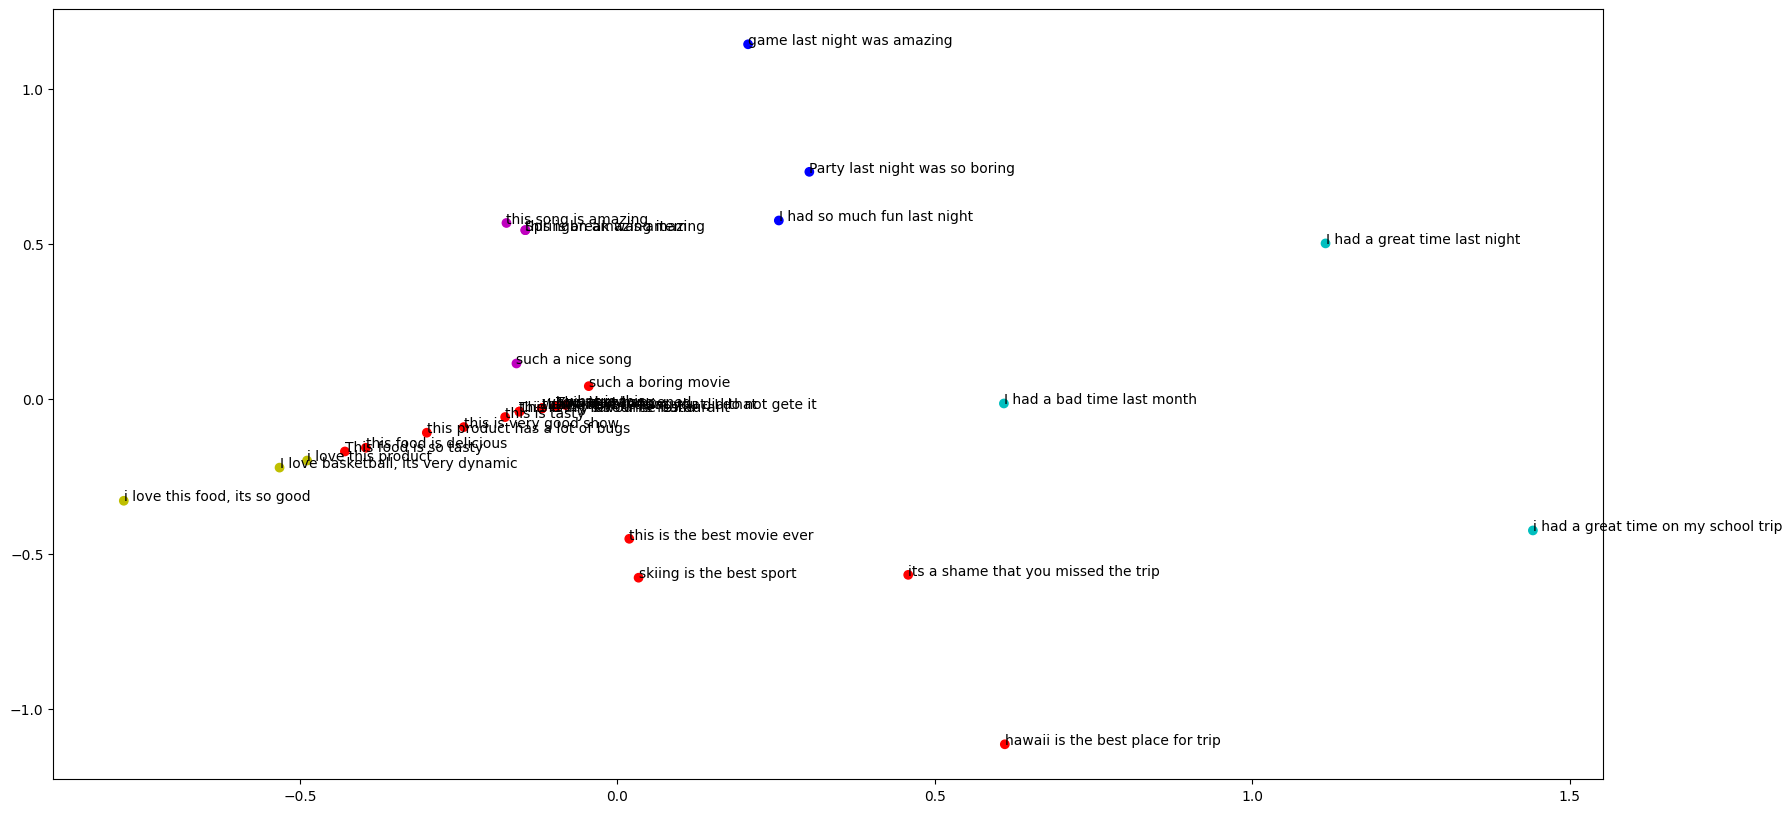

In [3]:

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = ["r", "b", "c", "y", "m" ]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

for i, txt in enumerate(x):
    ax.annotate(txt, (x_axis[i], y_axis[i]))

    